In [1]:
import unicodecsv
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

### Import Dataframe

In [2]:
df_product_id = pd.read_csv('../model/data/product_id_md1.csv')
df_product_id

,MATNR,Model,Color,Style,Cat2,Model_id,Color_id,Style_id,Cat2_id
0,19047936,Patisia,White,Vintage,ตู้ข้างเตียง,2886,16,24,61
1,19045101,Cannery,Yellow,Modern,โซฟา 3 ที่นั่ง,719,17,12,203
2,19050282,zNone,Multi-Colour,Vintage,กรอบรูป,8226,10,24,5
3,59000365,Meudon,Black,Contemporary,ชุดห้องนอน,2542,1,5,51
4,59001810,Alicia,White,Modern,ชุดห้องนอน,295,16,12,51
5,19049900,Santana,White,Modern,โซฟาเข้ามุมขวา,3107,16,12,207
6,19040929,Bella,Brown,Modern Italian,โซฟา 3 ที่นั่ง,564,3,16,203
7,19045046,Jovi,Black,Modern,โซฟา 4 ที่นั่ง,2040,1,12,204
8,19045211,Grazia,Brown Dark,Contemporary,เตียง,1519,4,5,189
9,59000343,Koloze,Brown Dark,Modern,zNone,2139,4,12,4566


# Model 1.1 Word Detection

### Normal Scale

In [4]:
from sklearn.neighbors import NearestNeighbors

input_item = 19045046   #ใส่ input(MATNR)
input_index = df_product_id.index[df_product_id['MATNR'] == input_item].tolist()[0]
call_frame = df_product_id.loc[(df_product_id.MATNR.isin([input_item])), ['Style_id', 'Cat2_id']]
item = call_frame.values

product = df_product_id.iloc[:,7:9].values
nbrs = NearestNeighbors(n_neighbors=11).fit(product)
nbrs_res = nbrs.kneighbors([item[0]])[1]
nbrs_list = nbrs_res.tolist()[0]
while input_index in nbrs_list: nbrs_list.remove(input_index)
result = nbrs_list
#print(result)
df_result = df_product_id.iloc[result]
result_matnr = df_result['MATNR']
list_matnr = result_matnr.tolist()
#print(nbrs.kneighbors([item[0]])[1])
print(list_matnr)
df_product_id.iloc[result]

[19064177, 19015403, 19063972, 19045904, 19127517, 19111460, 19086949, 19045101, 59013601, 19090904]


,MATNR,Model,Color,Style,Cat2,Model_id,Color_id,Style_id,Cat2_id
4023,19064177,Amex,White,Modern,โซฟา 4 ที่นั่ง,333,16,12,204
719,19015403,Amex,White,Modern,โซฟา 4 ที่นั่ง,333,16,12,204
4830,19063972,zNone,Blue,Modern,โซฟา 4 ที่นั่ง,8226,2,12,204
13221,19045904,Flamingo,Black,Modern,โซฟา 4 ที่นั่ง,1334,1,12,204
25325,19127517,Lerly,Grey,Modern,โซฟา 3 ที่นั่ง,2291,9,12,203
24967,19111460,Newman,Grey,Modern,โซฟา 3 ที่นั่ง,2718,9,12,203
6385,19086949,Capulet,Brown,Modern,โซฟา 3 ที่นั่ง,726,3,12,203
1,19045101,Cannery,Yellow,Modern,โซฟา 3 ที่นั่ง,719,17,12,203
23187,59013601,Locy,Yellow,Modern,โซฟา 3 ที่นั่ง,2347,17,12,203
16205,19090904,January,Grey,Modern,โซฟา 3 ที่นั่ง,1989,9,12,203


In [12]:
list_matnr
df_matnr = pd.DataFrame({'Result':list_matnr})
df_matnr2 = df_matnr['Result'].apply(str)
str_matnr = df_matnr2.tolist()

Populating the interactive namespace from numpy and matplotlib


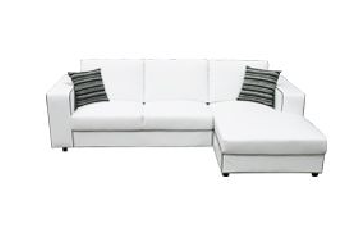

In [14]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../../../2_data/img/'+'19049900'+'.jpg')
imgplot = plt.imshow(img)
plt.show(axis('off'))

Populating the interactive namespace from numpy and matplotlib


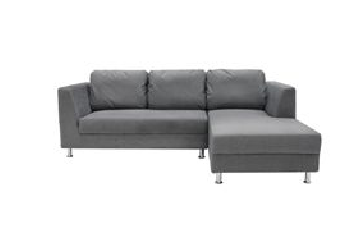

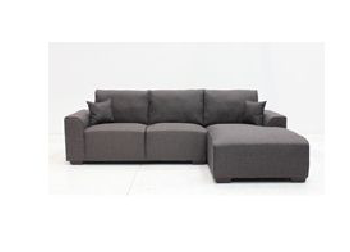

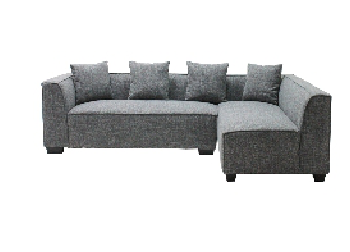

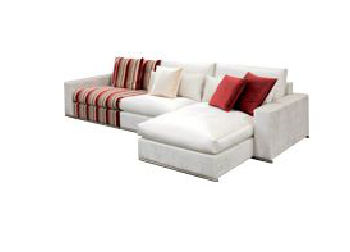

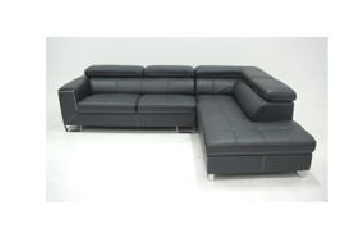

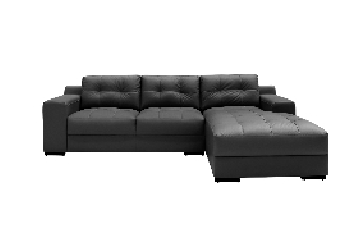

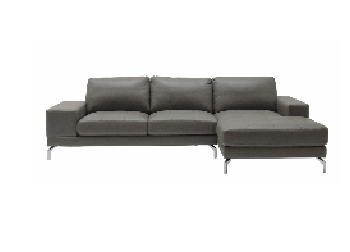

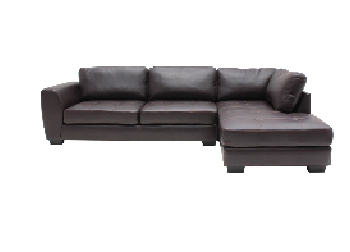

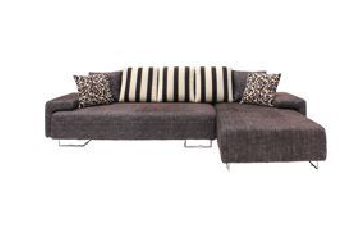

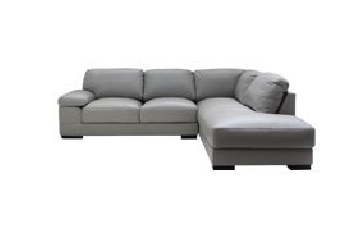

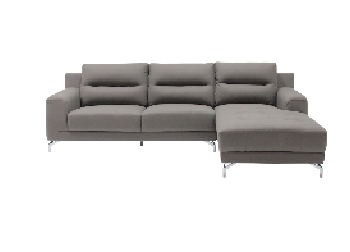

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for item in str_matnr:
    try:
        img = mpimg.imread('../../../2_data/img/'+item+'.jpg')
        imgplot = plt.imshow(img)
        plt.show(axis('off'))
    except (FileNotFoundError):
        pass

Rescaling (Normalize)

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

color_id_norm = df_product_id[['Color_id']].values
min_max_scaler = preprocessing.MinMaxScaler()
color_scaled = min_max_scaler.fit_transform(color_id_norm)
df_color_norm = pd.DataFrame(color_scaled, columns=['Color_id_n'])

sty_id_norm = df_product_id[['Style_id']].values
min_max_scaler = preprocessing.MinMaxScaler()
sty_scaled = min_max_scaler.fit_transform(sty_id_norm)
df_sty_norm = pd.DataFrame(sty_scaled, columns=['Style_id_n'])

cat2_id_norm = df_product_id[['Cat2_id']].values
min_max_scaler = preprocessing.MinMaxScaler()
cat2_scaled = min_max_scaler.fit_transform(cat2_id_norm)
df_cat2_norm = pd.DataFrame(cat2_scaled, columns=['Cat2_id_n'])

df_product_id_n = pd.concat([df_product_id, df_color_norm, df_sty_norm, df_cat2_norm], axis=1)
df_product_id_n.drop(df_product_id_n.columns[[5,6,7,8]], axis=1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Model 1.2 Word Detection

### Rescale

In [8]:
from sklearn.neighbors import NearestNeighbors

input_item = 19117034 #ใส่ input(MATNR)
input_index = df_product_id_n.index[df_product_id_n['MATNR'] == input_item].tolist()[0]
call_frame = df_product_id_n.loc[(df_product_id_n.MATNR.isin([input_item])), ['Color_id_n', 'Style_id_n', 'Cat2_id_n']]
item = call_frame.values

product = df_product_id_n.iloc[:,5:8].values
nbrs = NearestNeighbors(n_neighbors=11).fit(product)
nbrs_res = nbrs.kneighbors([item[0]])[1]
nbrs_list = nbrs_res.tolist()[0]
while input_index in nbrs_list: nbrs_list.remove(input_index)
result = nbrs_list
#print(result)
df_result = df_product_id.iloc[result]
result_matnr = df_result['MATNR']
list_matnr = result_matnr.tolist()
print(list_matnr)
df_product_id_n.iloc[result]

[19080279, 59008084, 59012842, 19090106, 19111488, 19097478, 19132830, 59012554, 59011377, 59012560]


,MATNR,Model,Color,Style,Cat2,Color_id_n,Style_id_n,Cat2_id_n
12177,19080279,Coupe,Black,Modern,โต๊ะอาหารขาเหล็กท๊อปไม้,0.0,0.002539,0.053231
18045,59008084,Hana,Black,Modern,โต๊ะอาหารขาเหล็กท๊อปไม้,0.0,0.002539,0.053231
23021,59012842,Anakin,Black,Modern,โต๊ะอาหารขาเหล็กท๊อปไม้,0.0,0.002539,0.053231
7626,19090106,Anakin,Black,Modern,โต๊ะอาหารขาเหล็กท๊อปไม้,0.0,0.002539,0.053231
19335,19111488,Zoki,Black,Modern,โต๊ะอาหารขาเหล็กท๊อปไม้,0.0,0.002539,0.053231
27515,19097478,Berska,Black,Modern,โต๊ะอาหารขาเหล็กท๊อปไม้,0.0,0.002539,0.053231
27545,19132830,Restrol,Black,Modern,โต๊ะอาหารขาเหล็กท๊อปไม้,0.0,0.002539,0.053231
20116,59012554,Restrol,Black,Modern,โต๊ะอาหารขาเหล็กท๊อปไม้,0.0,0.002539,0.053231
19306,59011377,Zoki,Black,Modern,โต๊ะอาหารขาเหล็กท๊อปไม้,0.0,0.002539,0.053231
19876,59012560,Zoki,Black,Modern,โต๊ะอาหารขาเหล็กท๊อปไม้,0.0,0.002539,0.053231


<b>Check Item</b>

In [9]:
df_product_id.loc[df_product_id['MATNR'] == 19100903]

,MATNR,Model,Color,Style,Cat2,Model_id,Color_id,Style_id,Cat2_id
7549,19100903,Econi,Brown Light,Modern,ตู้ข้างเตียง,1133,5,12,61
